# Final Project
## Linear Regression: Prediction on bike sharing demand

In [1]:
# Import

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# K fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier

# Error calculation
from sklearn import metrics
%matplotlib inline

### Importing the merged dataset

In [2]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [3]:
dataset_one_month = pd.read_csv(
    'April_1_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_three_months = pd.read_csv(
    'April_to_June_3_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

dataset_six_months = pd.read_csv(
    'April_to_Oct_6_months.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

In [4]:
dataset_one_month = dataset_one_month.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_one_month = dataset_one_month.dropna(axis=0, how='any')
dataset_one_month

In  Out  Station Id  Total  avg_temp  avg_temp_feel  avg_humidity  \
timestamp                                                                       
2016-04-01  36   22          40   14.0  8.520833       7.895833     66.500000   
2016-04-01  18   31          41  -13.0  8.520833       7.895833     66.500000   
2016-04-01  39   39          42    0.0  8.520833       7.895833     66.500000   
2016-04-01  20   37          43  -17.0  8.520833       7.895833     66.500000   
2016-04-01  24   38          44  -14.0  8.520833       7.895833     66.500000   
...         ..  ...         ...    ...       ...            ...           ...   
2016-04-30  52    4         790   48.0  9.083333       7.958333     55.979167   
2016-04-30  17   33         792  -16.0  9.083333       7.958333     55.979167   
2016-04-30  14   30         793  -16.0  9.083333       7.958333     55.979167   
2016-04-30   9   76         794  -67.0  9.083333       7.958333     55.979167   
2016-04-30  16    7         795    9.0  9.083333       7.958333     55.979167   

            avg_windSpeed  date  longitude  latitude  
timestamp                                             
2016-04-01      11.166667   1.0  -0.075579   51.5213  
2016-04-01      11.166667   1.0  -0.083911   51.5200  
2016-04-01      11.166667   1.0  -0.093904   51.5310  
2016-04-01      11.166667   1.0  -0.157184   51.5203  
2016-04-01      11.166667   1.0  -0.144165   51.5107  
...                   ...   ...        ...       ...  
2016-04-30      12.270833  30.0  -0.004810   51.5418  
2016-04-30      12.270833  30.0  -0.104541   51.5055  
2016-04-30      12.270833  30.0  -0.119559   51.5283  
2016-04-30      12.270833  30.0  -0.124580   51.4746  
2016-04-30      12.270833  30.0  -0.134849   51.5276  

[22584 rows x 11 columns]

In [5]:
dataset_three_months = dataset_three_months.drop(['index','is_holiday','is_weekend'], axis = 1)
#dataset = dataset.drop(['index'], axis = 1)
dataset_three_months = dataset_three_months.dropna(axis=0, how='any')
dataset_three_months

In  Out  Station Id  Total   avg_temp  avg_temp_feel  \
timestamp                                                          
2016-04-01  36   22          40   14.0   8.520833       7.895833   
2016-04-01  18   31          41  -13.0   8.520833       7.895833   
2016-04-01  39   39          42    0.0   8.520833       7.895833   
2016-04-01  20   37          43  -17.0   8.520833       7.895833   
2016-04-01  24   38          44  -14.0   8.520833       7.895833   
...         ..  ...         ...    ...        ...            ...   
2016-07-01  38   10         720   28.0  16.770833      16.770833   
2016-07-01  20   63         721  -43.0  16.770833      16.770833   
2016-07-01  23   17         722    6.0  16.770833      16.770833   
2016-07-01  41   40         723    1.0  16.770833      16.770833   
2016-07-01  17   16         724    1.0  16.770833      16.770833   

            avg_humidity  avg_windSpeed  date  longitude  latitude  
timestamp                                                           
2016-04-01     66.500000      11.166667   1.0  -0.075579   51.5213  
2016-04-01     66.500000      11.166667   1.0  -0.083911   51.5200  
2016-04-01     66.500000      11.166667   1.0  -0.093904   51.5310  
2016-04-01     66.500000      11.166667   1.0  -0.157184   51.5203  
2016-04-01     66.500000      11.166667   1.0  -0.144165   51.5107  
...                  ...            ...   ...        ...       ...  
2016-07-01     73.291667      22.270833   1.0  -0.205279   51.4872  
2016-07-01     73.291667      22.270833   1.0  -0.026263   51.5360  
2016-07-01     73.291667      22.270833   1.0  -0.058632   51.5246  
2016-07-01     73.291667      22.270833   1.0  -0.190346   51.4682  
2016-07-01     73.291667      22.270833   1.0  -0.184806   51.4580  

[69148 rows x 11 columns]

In [6]:
dataset_six_months = dataset_six_months.drop(['index','is_holiday','is_weekend'], axis = 1)
dataset_six_months = dataset_six_months.dropna(axis=0, how='any')
dataset_six_months

In  Out  Station Id  Total   avg_temp  avg_temp_feel  \
timestamp                                                          
2016-04-01  36   22          40   14.0   8.520833       7.895833   
2016-04-01  18   31          41  -13.0   8.520833       7.895833   
2016-04-01  39   39          42    0.0   8.520833       7.895833   
2016-04-01  20   37          43  -17.0   8.520833       7.895833   
2016-04-01  24   38          44  -14.0   8.520833       7.895833   
...         ..  ...         ...    ...        ...            ...   
2016-10-30   2   53         785  -51.0  10.680556      10.638889   
2016-10-30   1   37         789  -36.0  10.680556      10.638889   
2016-10-30   1   35         792  -34.0  10.680556      10.638889   
2016-10-30   1    8         813   -7.0  10.680556      10.638889   
2016-10-30   2   40         815  -38.0  10.680556      10.638889   

            avg_humidity  avg_windSpeed  date  longitude   latitude  
timestamp                                                            
2016-04-01         66.50      11.166667   1.0  -0.075579  51.521300  
2016-04-01         66.50      11.166667   1.0  -0.083911  51.520000  
2016-04-01         66.50      11.166667   1.0  -0.093904  51.531000  
2016-04-01         66.50      11.166667   1.0  -0.157184  51.520300  
2016-04-01         66.50      11.166667   1.0  -0.144165  51.510700  
...                  ...            ...   ...        ...        ...  
2016-10-30         90.25       4.881944  30.0  -0.010511  51.540900  
2016-10-30         90.25       4.881944  30.0  -0.011890  51.538700  
2016-10-30         90.25       4.881944  30.0  -0.104541  51.505500  
2016-10-30         90.25       4.881944  30.0  -0.122760  51.487807  
2016-10-30         90.25       4.881944  30.0  -0.115171  51.500452  

[156225 rows x 11 columns]

### Datasets for each stations

In [7]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj_1_m = dataset_one_month.groupby('Station Id')
obj_3_m = dataset_three_months.groupby('Station Id')
obj_6_m = dataset_six_months.groupby('Station Id')

In [8]:
# add datasets to list

df_1_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_1_m.append(obj_1_m.get_group(i))

In [9]:
# add datasets to list

df_3_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_3_m.append(obj_3_m.get_group(i))

In [10]:
# add datasets to list

df_6_m = []
dropped = [35,79,80,137,179,198,205,237,241,259,283,285,304,342,346,369,385,391,406,407,413,414,415,416,417,418,422,429,434,438,439,493,497,
           502,525,555,567,575,582,585,791,797,798,799,802]

#[35,79,80,179,198,205,237,259,283,285,342,369,385,413,414,415,416,417,418,422,429,434,438,439,493,497,
           #502,525,567,575,582,585,791,797,798,799,802]
    
for i in range(1, len(location['Station.Id'])):
    if i in dropped:
        continue
    df_6_m.append(obj_6_m.get_group(i))

## Plotting

In [11]:
def plot_graph(y_train, y_test, y_pred, i):
    ## Print heading
    plt.title( 'Station Id: %d' % (i))

    plt.plot(np.arange(0, len(y_train)), y_train, color='green', label="History")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='blue', marker='.', label="Actual")
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, color='red', marker='.', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();

## Error calculation

In [12]:
def get_MAE(y_test, y_pred):
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    return MAE

In [13]:
def get_MSE(y_test, y_pred):
    MSE = metrics.mean_squared_error(y_test, y_pred)
    return MSE

In [14]:
def print_error_calculation(y_test, y_pred):
    print('MAE:', get_MAE(y_test, y_pred))
    print('MSE:', get_MSE(y_test, y_pred))

## Linear Regression

In [15]:
def standardize(df):
    normalized_df = (df - df.mean()) / df.std()
    normalized_df
    return normalized_df

### Single Linear Regression

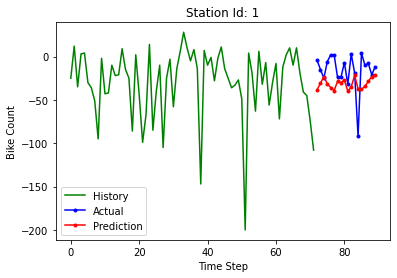

MAE: 21.641501083693438
MSE: 727.2895698429019


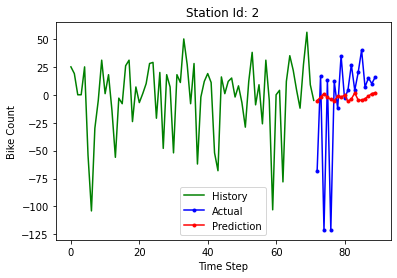

MAE: 31.42775377049033
MSE: 2179.220880487437


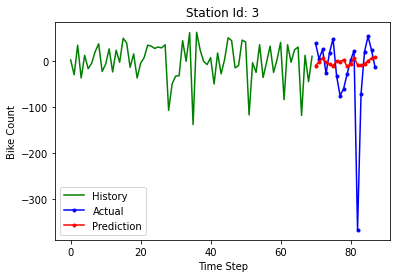

MAE: 51.5012910614816
MSE: 8566.504523489402


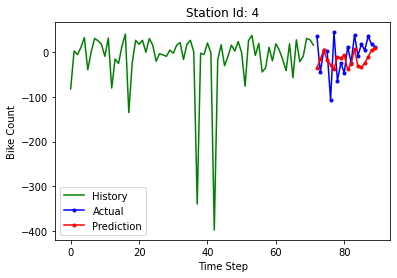

MAE: 35.252215481002644
MSE: 1867.1507358025394


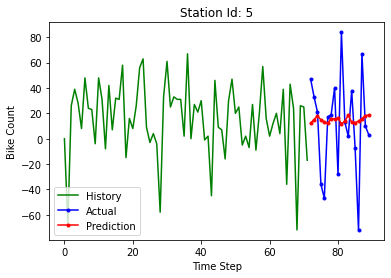

MAE: 29.946119831673457
MSE: 1509.981759130614


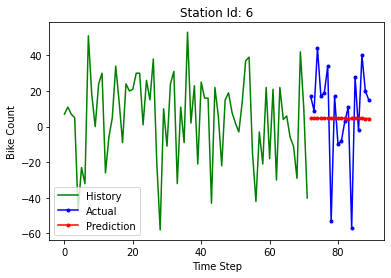

MAE: 20.577278261558565
MSE: 712.5596956771576


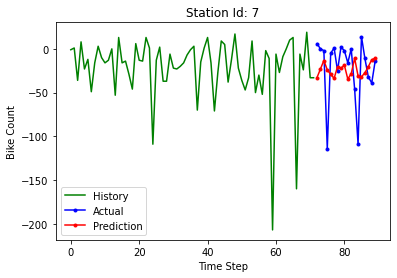

MAE: 29.526061270016882
MSE: 1369.3873657169722


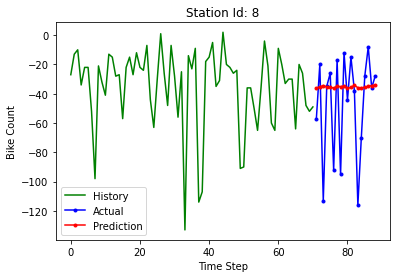

MAE: 26.12862015318334
MSE: 1301.2168445300404


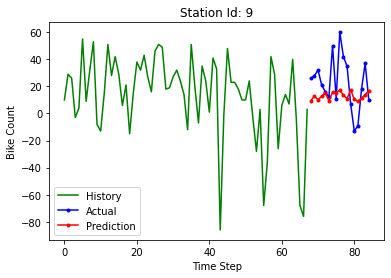

MAE: 16.958763944297782
MSE: 417.39415177745184


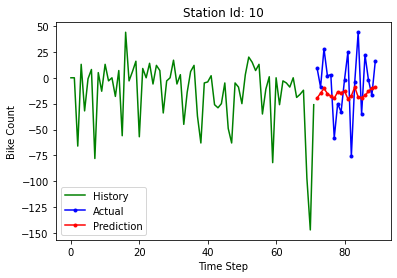

MAE: 25.521493499518876
MSE: 949.9862457791775

Error Calculation
Average MAE: 28.848109835691695
Average MSE: 1960.0691772233695


In [16]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    X = df_3_m[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df_3_m[i].values[:, 3:4] # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)

    # record prediction in a dataframe
    df_temp_pred = pd.DataFrame(list(y_pred))
    df_temp_pred.columns = ['temp_prediction']
    df_linear_pred = pd.concat([df_linear_pred,df_temp_pred])
    
    plot_graph(y_train, y_test, y_pred, i+1)

    ## Calculate error
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Robust Scaler

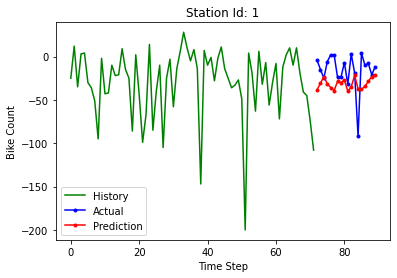

MAE: 21.641501083693438
MSE: 727.289569842902


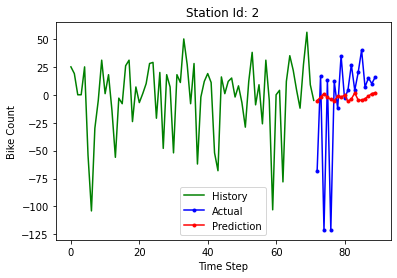

MAE: 31.42775377049033
MSE: 2179.220880487437


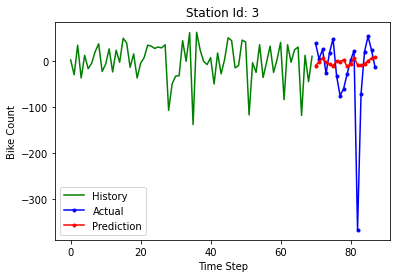

MAE: 51.5012910614816
MSE: 8566.504523489402


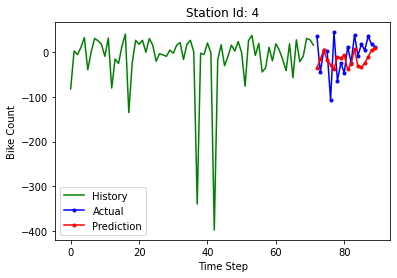

MAE: 35.252215481002644
MSE: 1867.1507358025394


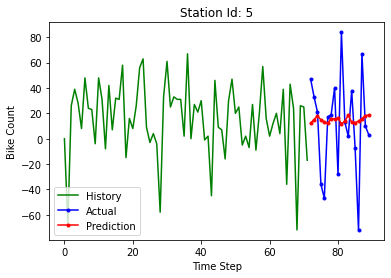

MAE: 29.94611983167345
MSE: 1509.9817591306137


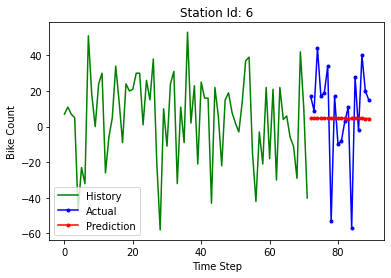

MAE: 20.577278261558565
MSE: 712.5596956771576


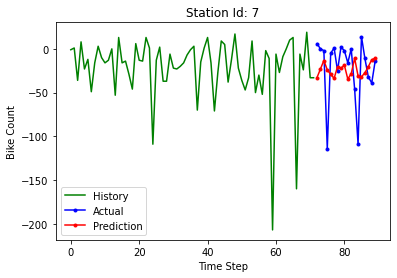

MAE: 29.526061270016882
MSE: 1369.3873657169722


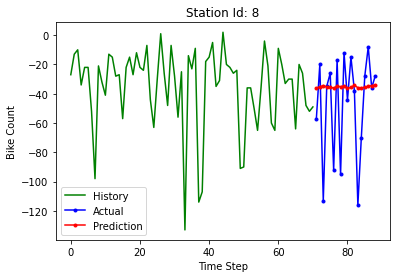

MAE: 26.12862015318334
MSE: 1301.2168445300404


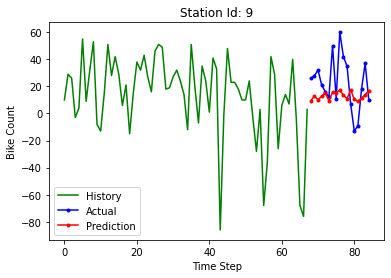

MAE: 16.958763944297786
MSE: 417.39415177745184


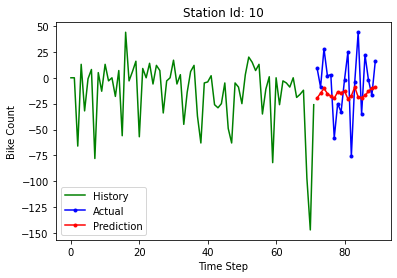

MAE: 25.52149349951888
MSE: 949.9862457791777

Error Calculation
Average MAE: 28.848109835691695
Average MSE: 1960.0691772233695


In [17]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10


for i in range(0, no_station):  
    X = df_3_m[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df_3_m[i].values[:, 3:4] # Predict

    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()
    
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    y_pred = regression_model.predict(X_test)
    
    y_pred = TargetVarScalerFit.inverse_transform(y_pred)
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    
    plot_graph(y_train, y_test, y_pred, i+1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Multiple Linear Regression

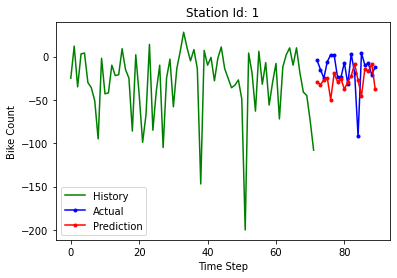

MAE: 20.949334935532207
MSE: 757.535975391593


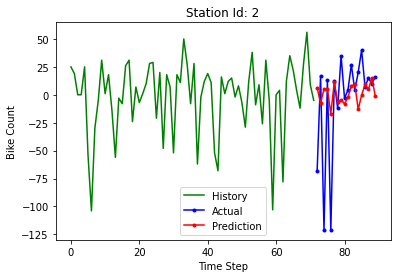

MAE: 29.38470850405872
MSE: 2123.6981755808997


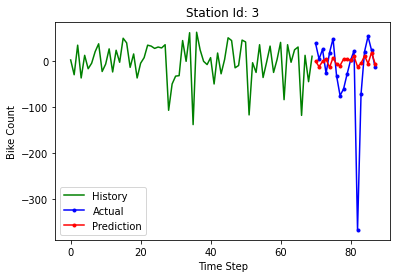

MAE: 49.18976069080427
MSE: 8305.703007870005


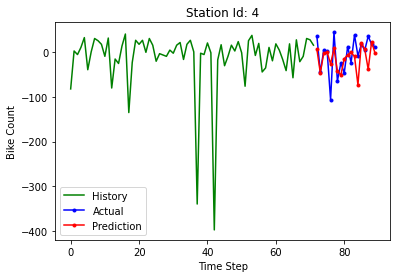

MAE: 27.207463041457647
MSE: 1331.4698931487865


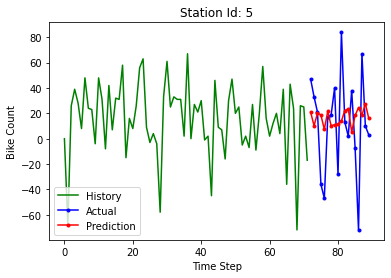

MAE: 31.94621093735686
MSE: 1608.8949179817216


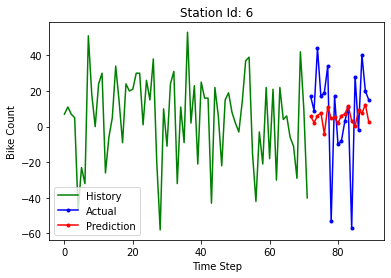

MAE: 20.14680464152719
MSE: 686.4575709618467


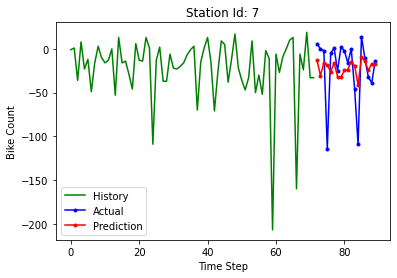

MAE: 24.23828632036584
MSE: 1094.6532223824177


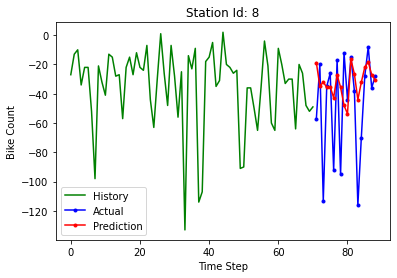

MAE: 25.50375958710445
MSE: 1264.778881153231


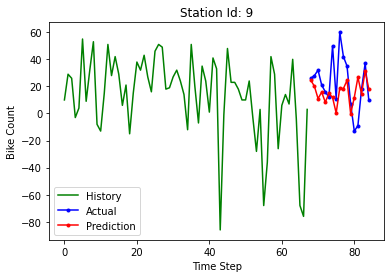

MAE: 15.010901396490484
MSE: 387.278666245145


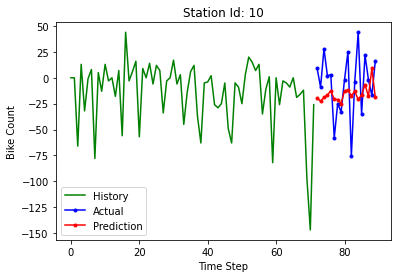

MAE: 26.512852961758686
MSE: 990.372501097112

Error Calculation
Average MAE: 27.009008301645633
Average MSE: 1855.0842811812756


In [18]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8]  # all variables
    y = df_3_m[i].values[:, 3:4] # 'Total
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    y_pred = regression_model.predict(X_test)

    plot_graph(y_train, y_test, y_pred, i+1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')
    
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Robust Scaler

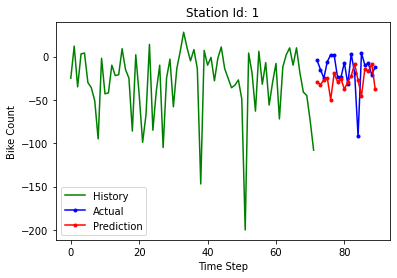

MAE: 20.949334935532203
MSE: 757.5359753915926


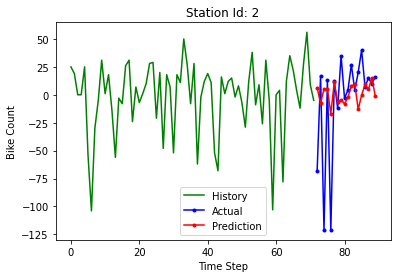

MAE: 29.384708504058715
MSE: 2123.6981755808997


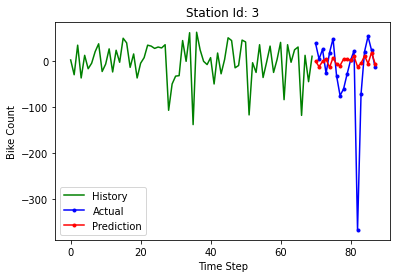

MAE: 49.189760690804256
MSE: 8305.703007870005


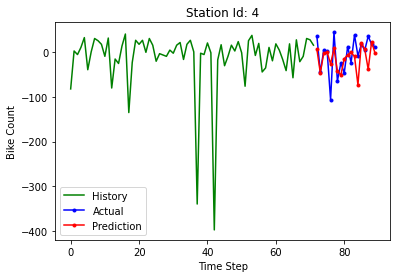

MAE: 27.207463041457654
MSE: 1331.469893148787


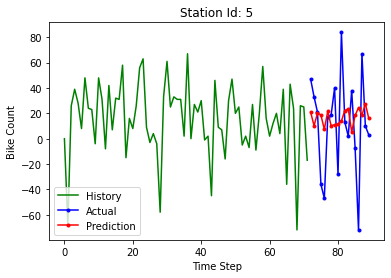

MAE: 31.94621093735686
MSE: 1608.894917981722


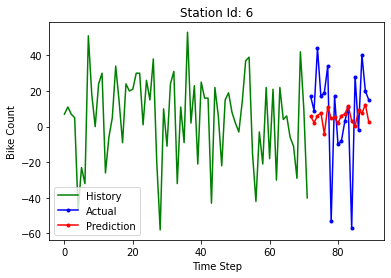

MAE: 20.14680464152719
MSE: 686.4575709618467


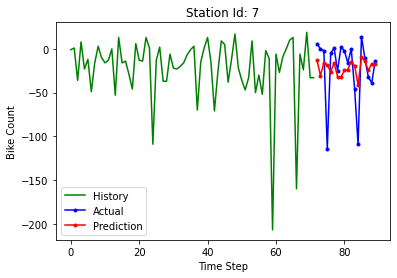

MAE: 24.238286320365837
MSE: 1094.6532223824179


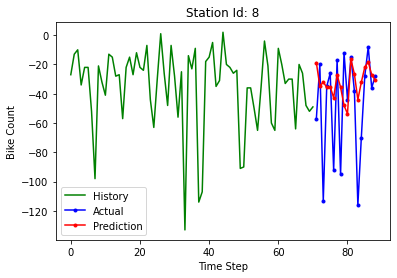

MAE: 25.503759587104454
MSE: 1264.7788811532307


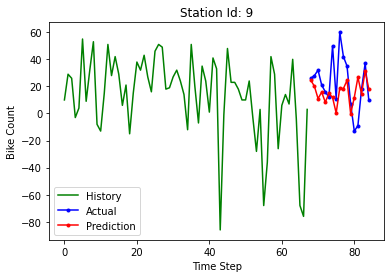

MAE: 15.010901396490445
MSE: 387.27866624514405


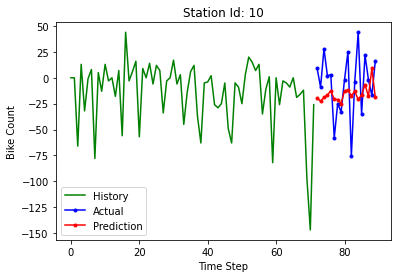

MAE: 26.512852961758693
MSE: 990.3725010971123

Error Calculation
Average MAE: 27.009008301645633
Average MSE: 1855.0842811812759


In [19]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10


for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date' [:,4:8]
    y = df_3_m[i].values[:, 3:4] # Predict

    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()
    
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    y_pred = regression_model.predict(X_test)
    
    y_pred = TargetVarScalerFit.inverse_transform(y_pred)
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    
    plot_graph(y_train, y_test, y_pred, i+1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

## K fold 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


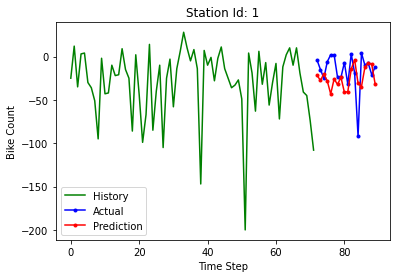

MAE: 19.387582895546885
MSE: 634.8045962615794
Fitting 5 folds for each of 5 candidates, totalling 25 fits


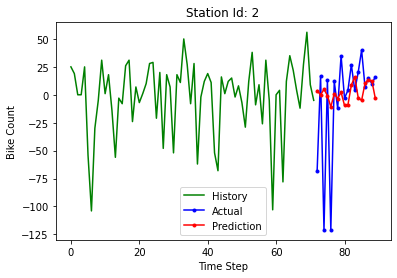

MAE: 29.710400023237508
MSE: 2140.237141847178
Fitting 5 folds for each of 5 candidates, totalling 25 fits


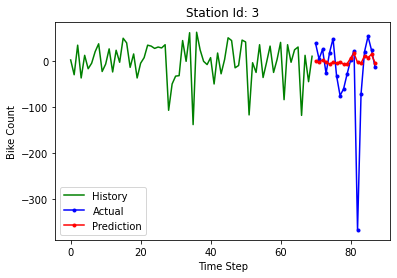

MAE: 47.55156521209407
MSE: 8530.023577523294
Fitting 5 folds for each of 5 candidates, totalling 25 fits


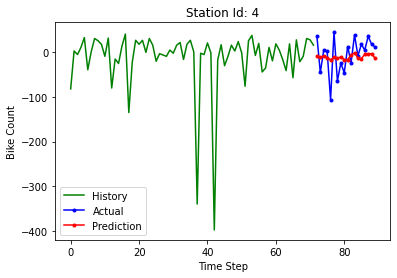

MAE: 31.287247151396983
MSE: 1376.0917712911958
Fitting 5 folds for each of 5 candidates, totalling 25 fits


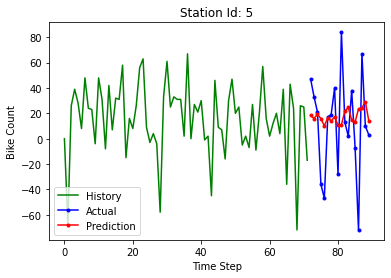

MAE: 29.994485115904507
MSE: 1523.1321299127137
Fitting 5 folds for each of 5 candidates, totalling 25 fits


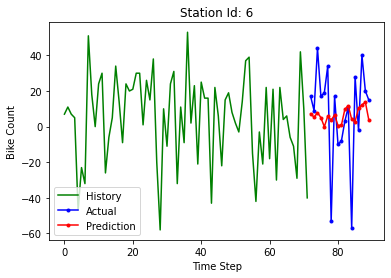

MAE: 19.262841741086778
MSE: 651.7839337038555
Fitting 5 folds for each of 5 candidates, totalling 25 fits


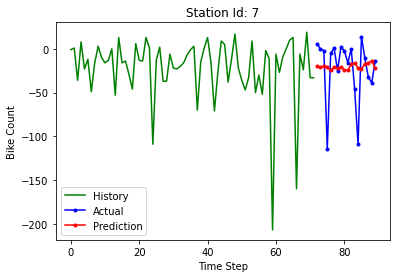

MAE: 26.73575918390293
MSE: 1283.631587634592
Fitting 5 folds for each of 5 candidates, totalling 25 fits


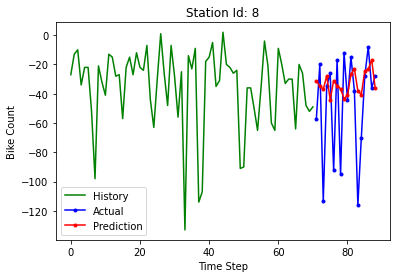

MAE: 27.40303665856691
MSE: 1303.4828960704258
Fitting 5 folds for each of 5 candidates, totalling 25 fits


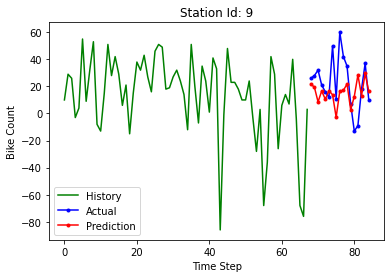

MAE: 15.775000234624526
MSE: 416.5822234318545
Fitting 5 folds for each of 5 candidates, totalling 25 fits


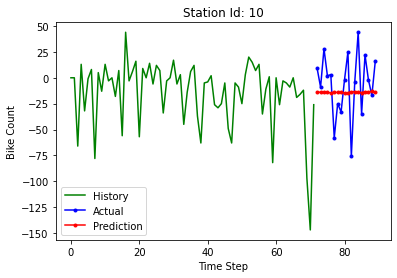

MAE: 25.60597188521467
MSE: 950.4040222240292

Error Calculation
Average MAE: 27.271389010157577
Average MSE: 1881.0173879900717


In [20]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8]  # all variables
                                #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date' [:,4:8]
    y = df_3_m[i]['Total'].values # Predict
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]


    # step-3: perform grid search
    # 3.1 specify model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    rfe = RFE(regression_model)             

    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, y_train)   
    y_pred = model_cv.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


## Scaler

### Robust Scaler

Fitting 5 folds for each of 5 candidates, totalling 25 fits


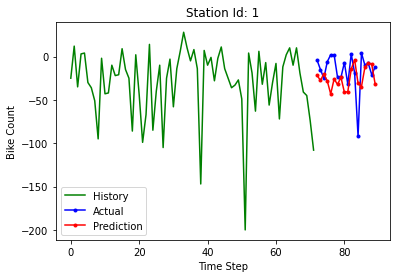

MAE: 19.38758289554689
MSE: 634.8045962615794
Fitting 5 folds for each of 5 candidates, totalling 25 fits


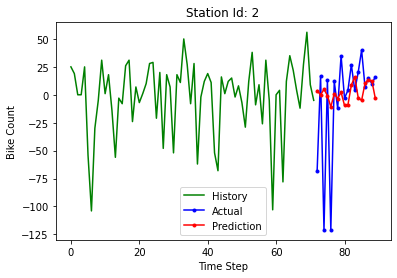

MAE: 29.710400023237508
MSE: 2140.2371418471776
Fitting 5 folds for each of 5 candidates, totalling 25 fits


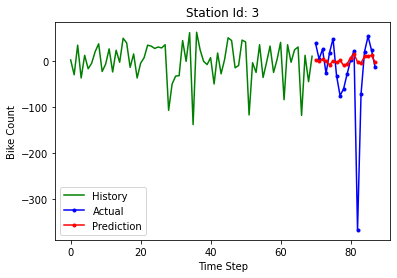

MAE: 47.722206861110635
MSE: 8568.198314534984
Fitting 5 folds for each of 5 candidates, totalling 25 fits


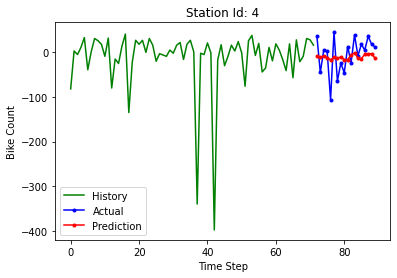

MAE: 31.287247151396983
MSE: 1376.0917712911962
Fitting 5 folds for each of 5 candidates, totalling 25 fits


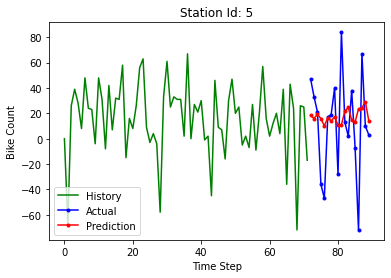

MAE: 29.994485115904507
MSE: 1523.1321299127137
Fitting 5 folds for each of 5 candidates, totalling 25 fits


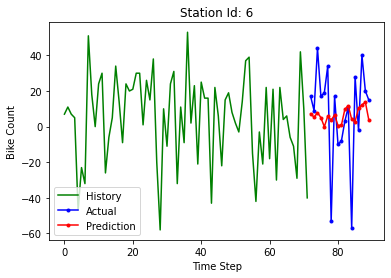

MAE: 19.262841741086778
MSE: 651.7839337038554
Fitting 5 folds for each of 5 candidates, totalling 25 fits


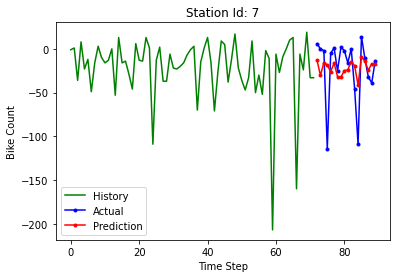

MAE: 24.21806188154622
MSE: 1092.3277298033247
Fitting 5 folds for each of 5 candidates, totalling 25 fits


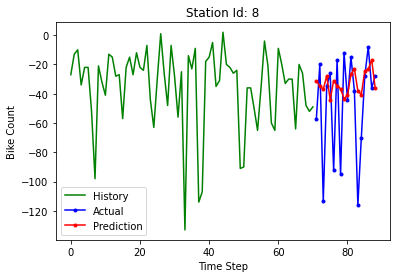

MAE: 27.40303665856691
MSE: 1303.4828960704258
Fitting 5 folds for each of 5 candidates, totalling 25 fits


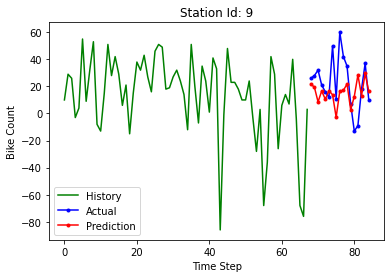

MAE: 15.775000234624516
MSE: 416.5822234318545
Fitting 5 folds for each of 5 candidates, totalling 25 fits


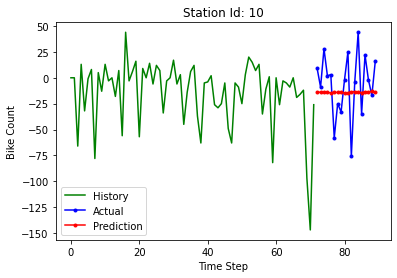

MAE: 25.60597188521467
MSE: 950.4040222240292

Error Calculation
Average MAE: 27.036683444823563
Average MSE: 1865.704475908114


In [21]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    X = df_3_m[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date' [:,4:8]
    y = df_3_m[i].values[:, 3:4] # Predict

    #PredictorScaler = StandardScaler()
    #TargetVarScaler = StandardScaler()
    
    PredictorScaler = RobustScaler()
    TargetVarScaler = RobustScaler()

    #PredictorScaler = MinMaxScaler()
    #TargetVarScaler = MinMaxScaler()
    
    PredictorScalerFit = PredictorScaler.fit(X)
    TargetVarScalerFit = TargetVarScaler.fit(y)
    X = PredictorScalerFit.transform(X)
    y = TargetVarScalerFit.transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]


    # step-3: perform grid search
    # 3.1 specify model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    rfe = RFE(regression_model)             

    # 3.2 call GridSearchCV()
    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, y_train)   
    y_pred = model_cv.predict(X_test)
    
    y_pred = TargetVarScalerFit.inverse_transform(y_pred)
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_train = TargetVarScalerFit.inverse_transform(y_train)
    
    plot_graph(y_train, y_test, y_pred, i+1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

In [22]:
# lists of predicted and actual data for each of the stations
#station_df

- https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
- https://realpython.com/linear-regression-in-python/

# Extra  Tree Regression

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


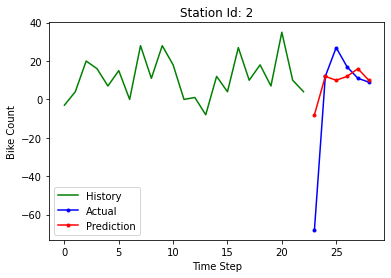

MAE: 14.666666666666666
MSE: 656.6666666666666


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


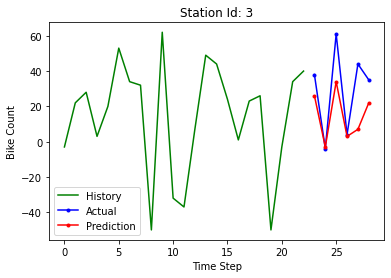

MAE: 15.166666666666666
MSE: 402.1666666666667


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


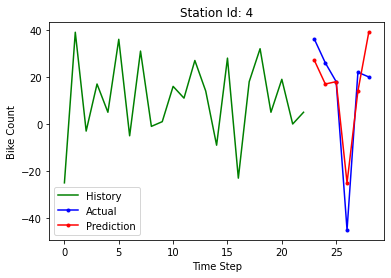

MAE: 10.833333333333334
MSE: 164.5


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


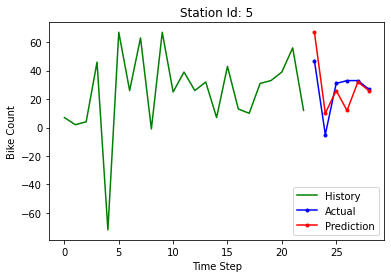

MAE: 10.5
MSE: 182.16666666666666


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


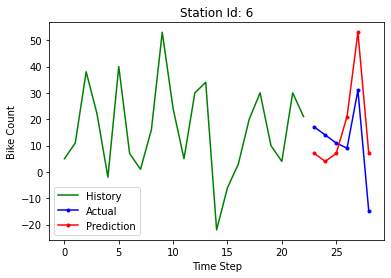

MAE: 13.333333333333334
MSE: 221.33333333333334


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


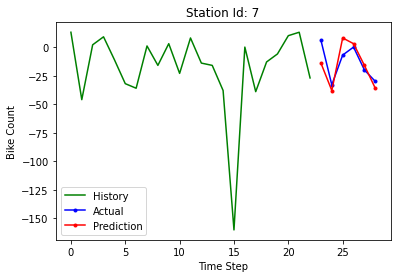

MAE: 8.833333333333334
MSE: 118.5


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


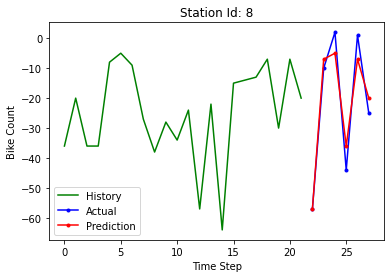

MAE: 5.166666666666667
MSE: 35.166666666666664


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


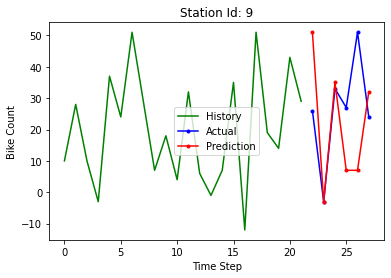

MAE: 16.5
MSE: 504.8333333333333


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1925448768.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


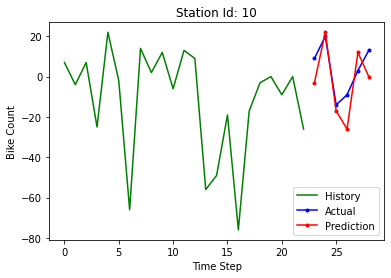

MAE: 9.333333333333334
MSE: 116.0

Error Calculation
Average MAE: 10.433333333333334
Average MSE: 240.13333333333335


In [23]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

from sklearn.ensemble import ExtraTreesRegressor 

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_1_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_1_m[i].values[:, 3:4]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesClassifier(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


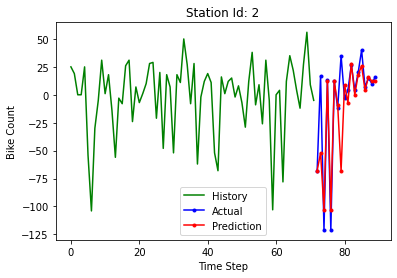

MAE: 14.777777777777779
MSE: 918.8888888888889


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


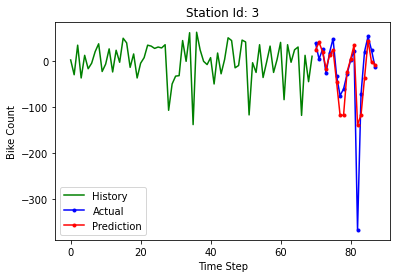

MAE: 33.111111111111114
MSE: 3645.777777777778


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


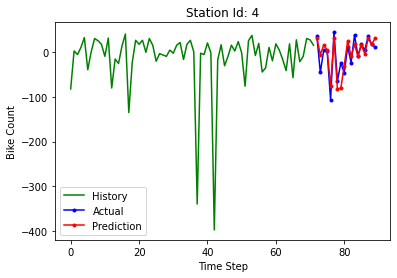

MAE: 15.166666666666666
MSE: 431.5


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


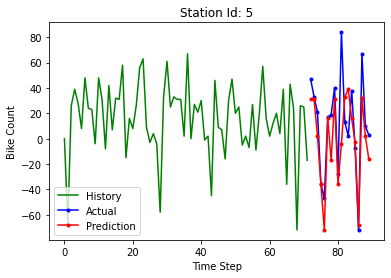

MAE: 19.61111111111111
MSE: 798.1666666666666


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


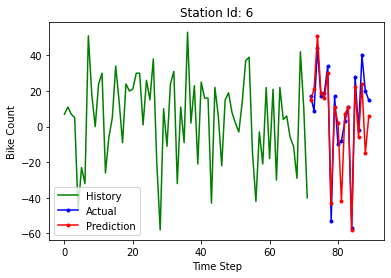

MAE: 9.277777777777779
MSE: 182.94444444444446


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


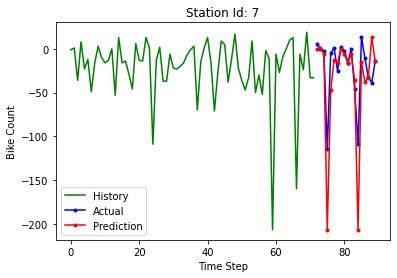

MAE: 22.11111111111111
MSE: 1376.5555555555557


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


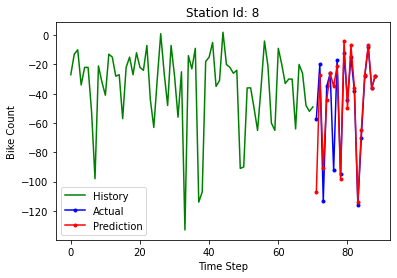

MAE: 10.277777777777779
MSE: 365.94444444444446


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


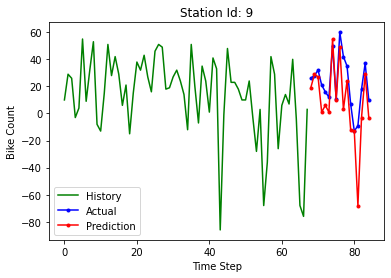

MAE: 14.176470588235293
MSE: 411.8235294117647


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/1936418977.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


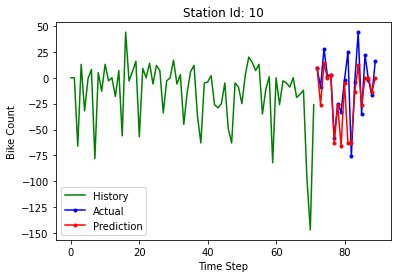

MAE: 15.0
MSE: 638.0

Error Calculation
Average MAE: 15.350980392156865
Average MSE: 876.9601307189544


In [24]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

from sklearn.ensemble import ExtraTreesRegressor 

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_3_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesClassifier(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


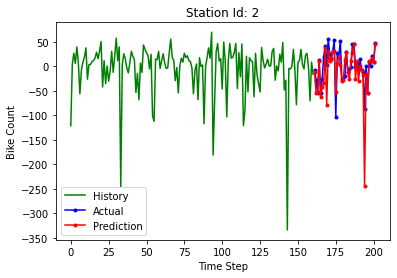

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


MAE: 18.21951219512195
MSE: 1133.2926829268292


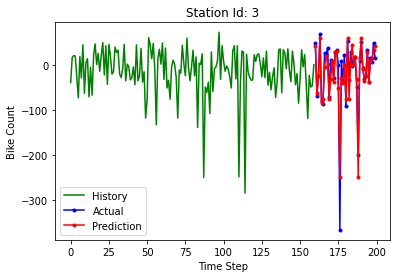

MAE: 17.225
MSE: 794.125


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


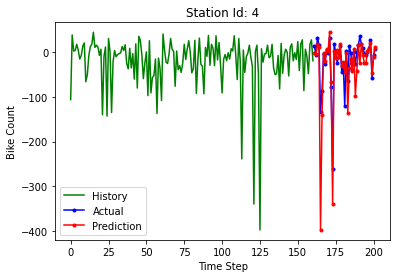

MAE: 25.121951219512194
MSE: 2605.4146341463415


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


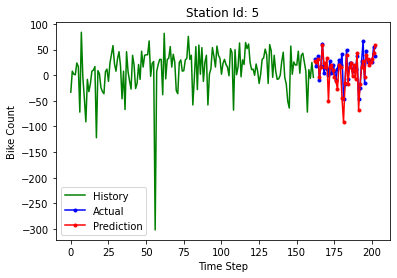

MAE: 14.24390243902439
MSE: 476.3414634146341


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


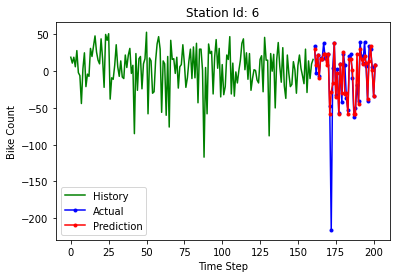

MAE: 12.073170731707316
MSE: 1006.9512195121952


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


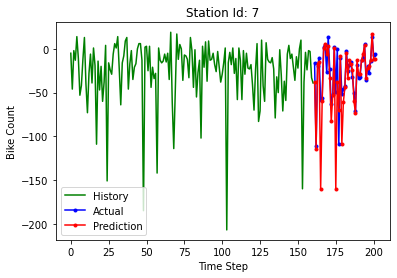

MAE: 13.536585365853659
MSE: 763.1951219512196


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


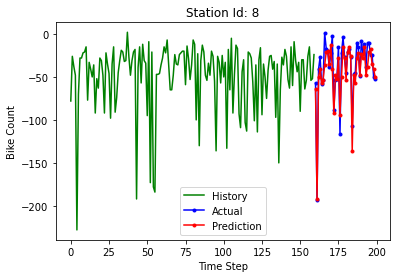

MAE: 9.7
MSE: 196.15


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


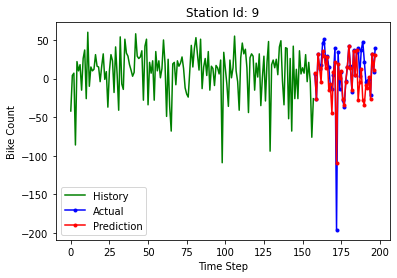

MAE: 13.575
MSE: 644.175


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3608107250.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train, y_train)


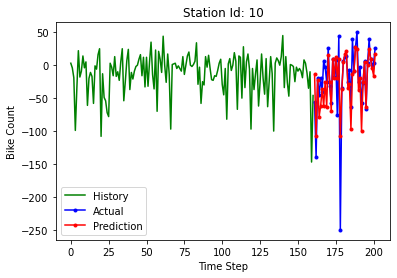

MAE: 20.463414634146343
MSE: 1109.1951219512196

Error Calculation
Average MAE: 14.415853658536586
Average MSE: 872.8840243902439


In [25]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

from sklearn.ensemble import ExtraTreesRegressor 

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_6_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_6_m[i].values[:, 3:4]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    extraTree_model = ExtraTreesClassifier(n_estimators=8)
    extraTree_model.fit(X_train, y_train)
    
    y_pred = extraTree_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)


# random forest regression

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


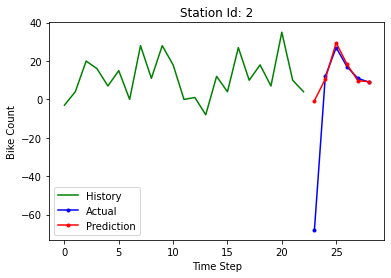

MAE: 12.333333333333334
MSE: 758.453125


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


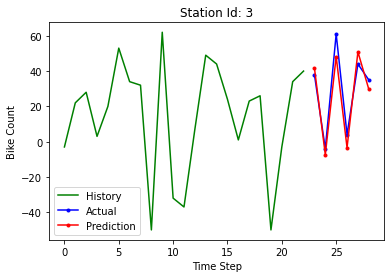

MAE: 6.5625
MSE: 52.872395833333336


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


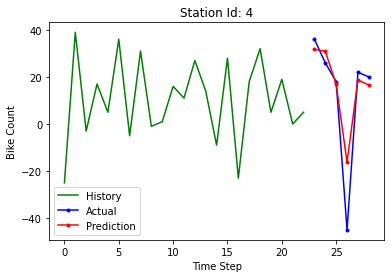

MAE: 7.625
MSE: 148.73958333333334


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


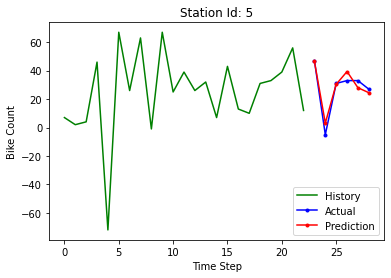

MAE: 3.8541666666666665
MSE: 23.091145833333332


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


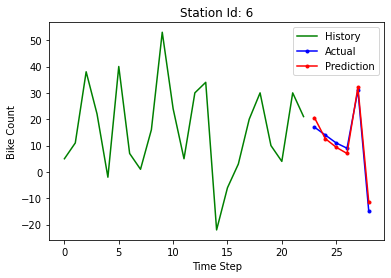

MAE: 2.2083333333333335
MSE: 5.864583333333333


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


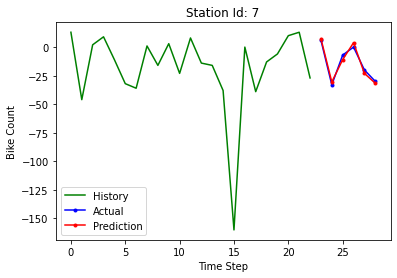

MAE: 2.7291666666666665
MSE: 8.466145833333334


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


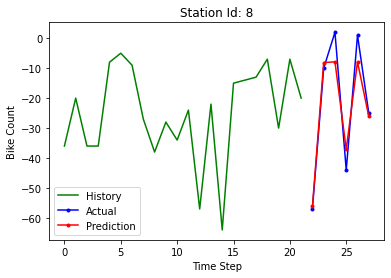

MAE: 4.916666666666667
MSE: 38.182291666666664


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


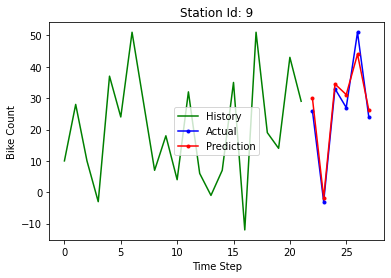

MAE: 3.3541666666666665
MSE: 15.1484375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3597563828.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


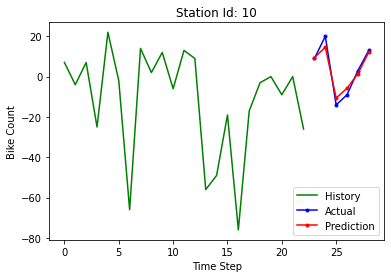

MAE: 2.4583333333333335
MSE: 9.0

Error Calculation
Average MAE: 4.604166666666666
Average MSE: 105.98177083333334


In [26]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

from sklearn.ensemble import RandomForestRegressor

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_1_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_1_m[i].values[:, 3:4] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    randomForest_model = RandomForestRegressor(n_estimators=8)
    randomForest_model.fit(X_train, y_train)
    
    y_pred = randomForest_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


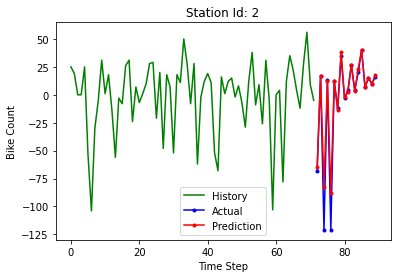

MAE: 4.944444444444445
MSE: 147.77430555555554


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


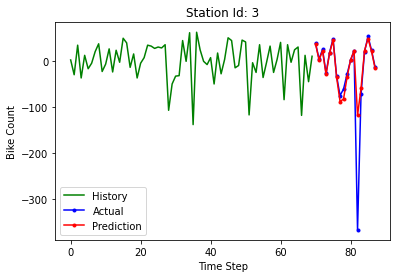

MAE: 18.368055555555557
MSE: 3470.9609375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


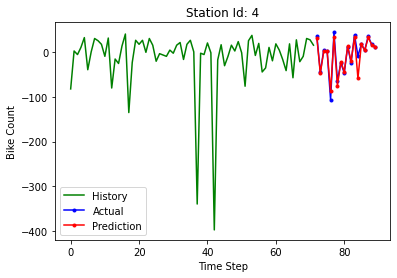

MAE: 6.631944444444445
MSE: 177.23177083333334


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


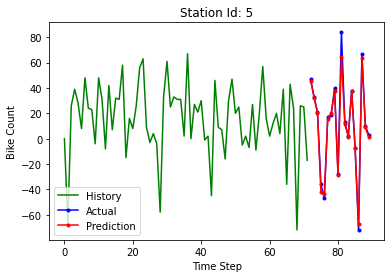

MAE: 2.7916666666666665
MSE: 26.140625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


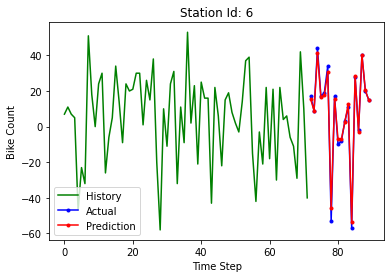

MAE: 1.6875
MSE: 5.783854166666667


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


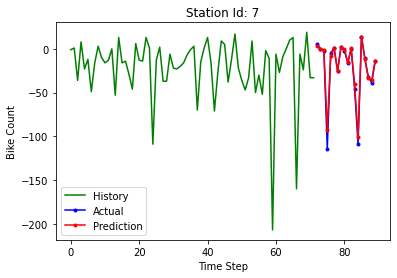

MAE: 2.9097222222222223
MSE: 33.556423611111114


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


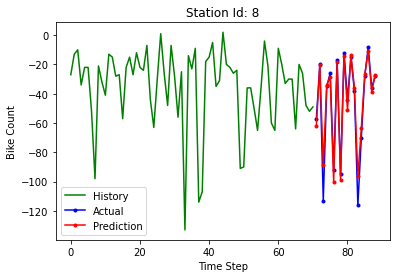

MAE: 5.222222222222222
MSE: 67.5625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


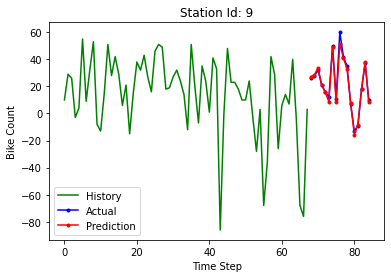

MAE: 1.7647058823529411
MSE: 6.863970588235294


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/3946063385.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


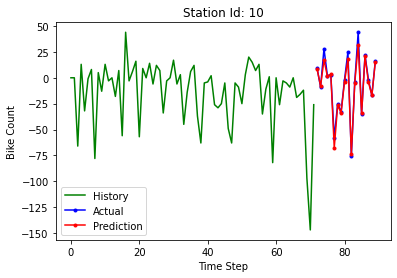

MAE: 3.0277777777777777
MSE: 23.953125

Error Calculation
Average MAE: 4.734803921568627
Average MSE: 395.98275122549023


In [27]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0

from sklearn.ensemble import RandomForestRegressor

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_3_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    randomForest_model = RandomForestRegressor(n_estimators=8)
    randomForest_model.fit(X_train, y_train)
    
    y_pred = randomForest_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


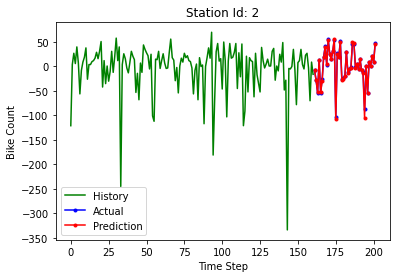

MAE: 1.5548780487804879
MSE: 10.358231707317072


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


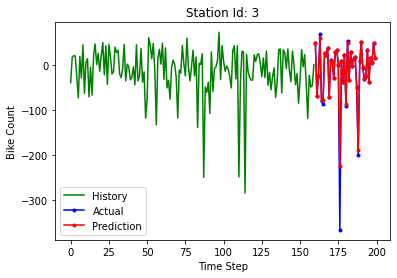

MAE: 5.08125
MSE: 509.75390625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


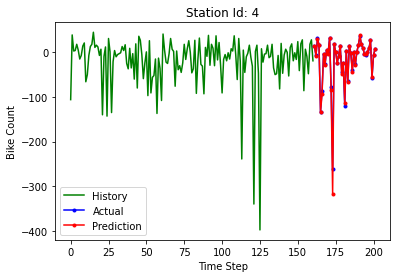

MAE: 2.682926829268293
MSE: 80.99161585365853


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


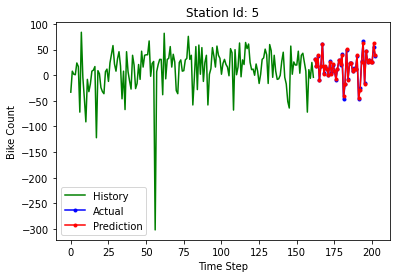

MAE: 1.2560975609756098
MSE: 4.314786585365853


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


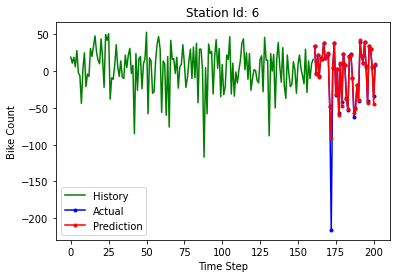

MAE: 4.2073170731707314
MSE: 389.9207317073171


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


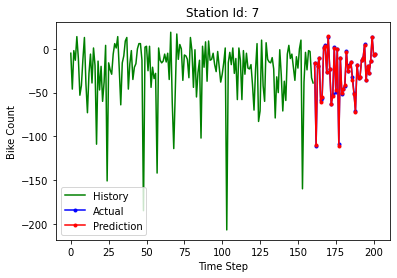

MAE: 0.7865853658536586
MSE: 1.2865853658536586


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


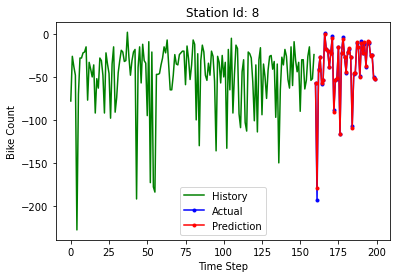

MAE: 1.175
MSE: 6.26015625


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


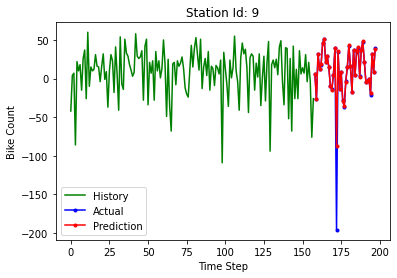

MAE: 3.215625
MSE: 297.524609375


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/375661990.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(X_train, y_train)


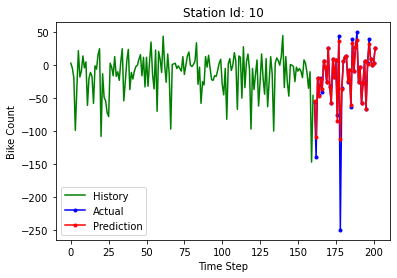

MAE: 5.7073170731707314
MSE: 498.3780487804878

Error Calculation
Average MAE: 2.566699695121951
Average MSE: 179.87886718750002


In [28]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
from sklearn.ensemble import RandomForestRegressor

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_6_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_6_m[i].values[:, 3:4] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    randomForest_model = RandomForestRegressor(n_estimators=8)
    randomForest_model.fit(X_train, y_train)
    
    y_pred = randomForest_model.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

### Feature selection

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=4)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

[0.32432787 0.66604322 0.00829647 0.00133245]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


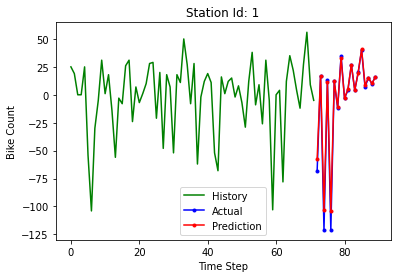

MAE: 3.013888888888889
MSE: 39.829861111111114
[0.02789684 0.36188908 0.60569664 0.00451745]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


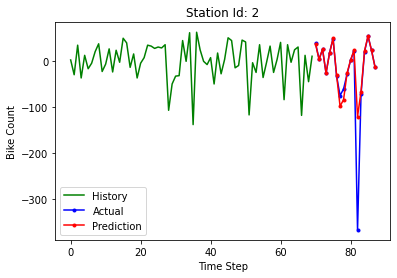

MAE: 17.395833333333332
MSE: 3410.7821180555557


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.00604111 0.36050461 0.63056114 0.00289314]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


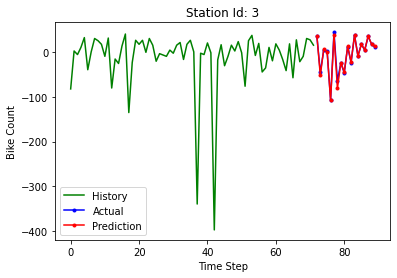

MAE: 2.375
MSE: 20.696180555555557
[7.02040127e-04 9.90595578e-02 8.97778713e-01 2.45968917e-03]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


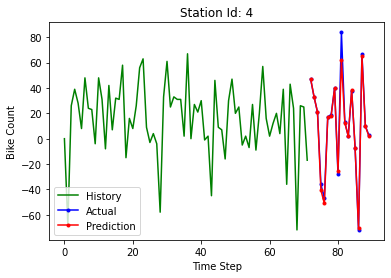

MAE: 2.25
MSE: 29.16840277777778


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.24921844 0.74560079 0.00261392 0.00256684]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


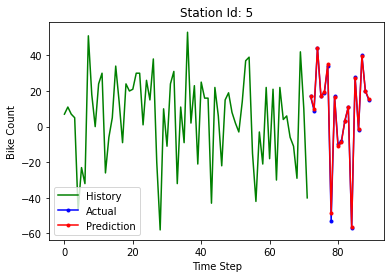

MAE: 0.7361111111111112
MSE: 1.5329861111111112
[0.36247568 0.         0.63082493 0.0066994 ]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


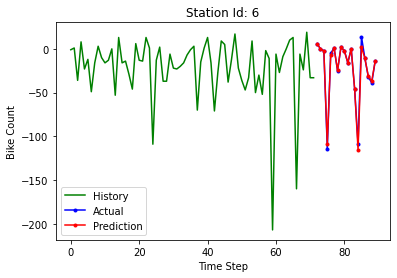

MAE: 1.7013888888888888
MSE: 12.139756944444445
[0.28387515 0.70897358 0.00342875 0.00372252]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


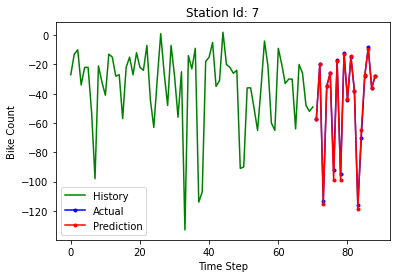

MAE: 1.5416666666666667
MSE: 6.307291666666667


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.11909155 0.8770368  0.00137356 0.00249809]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


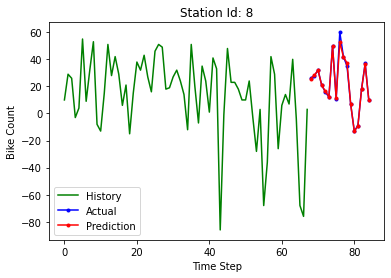

MAE: 0.7794117647058824
MSE: 3.5753676470588234


/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_97188/2407938702.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extraTree_model.fit(X_train_fs, y_train)


[0.01342078 0.25353008 0.72613836 0.00691078]
feature:  In
feature:  Out
feature:  Station Id
feature:  Total


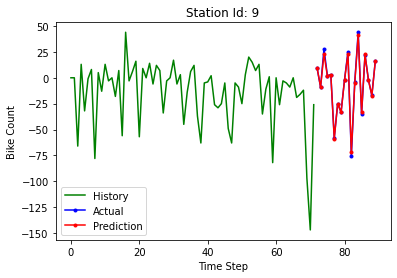

MAE: 1.125
MSE: 3.296875

Error Calculation
Average MAE: 3.0918300653594772
Average MSE: 352.7328839869282


In [30]:
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

for i in range(1, no_station):  
    X = df_3_m[i].values[:, 0:11]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date'
    y = df_3_m[i].values[:, 3:4] # 'In'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    
    extraTree_model = ExtraTreesRegressor(n_estimators=8)
    extraTree_model.fit(X_train_fs, y_train)
    print(extraTree_model.feature_importances_)
        
    for feat, importance in zip(df_3_m[1].columns, extraTree_model.feature_importances_):
        print ('feature: ',feat) 
    
    
    y_pred = extraTree_model.predict(X_test_fs)
    
    plot_graph(y_train, y_test, y_pred, i)

    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)

print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)

In [31]:
"""
# split into input (train) and output (test) variables for each of the datasets
totalMAE = 0
totalMSE = 0
totalRMAE = 0
totalRMSE = 0

#no_station = len(location['Station.Id'])
no_station = 10

# empty dataframe
df_linear_pred = pd.DataFrame(columns=['prediction'])

for i in range(0, no_station):  
    # from sklearn.preprocessing import StandardScaler
    #PredictorScaler = StandardScaler()
    
    #from sklearn.preprocessing import RobustScaler
    #PredictorScaler = RobustScaler()
    
    # from sklearn.preprocessing import MinMaxScaler
    PredictorScaler = MinMaxScaler()
    
    X = df_3_m[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date' [:,4:8]
    y = df_3_m[i]['Total'].values # Predict
    
    X = PredictorScaler.fit(X).transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)                                           

    # specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1, 6))}]

    # perform grid search
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    rfe = RFE(regression_model)             

    model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

    # fit the model
    model_cv.fit(X_train, y_train)   
    y_pred = model_cv.predict(X_test)
    
    plot_graph(y_train, y_test, y_pred, i + 1)
    print_error_calculation(y_test,y_pred)

    totalMAE += get_MAE(y_test,y_pred)
    totalMSE += get_MSE(y_test,y_pred)
    
print('')
print('Error Calculation')  
print('Average MAE:', totalMAE / no_station)
print('Average MSE:', totalMSE / no_station)
"""

"\n# split into input (train) and output (test) variables for each of the datasets\ntotalMAE = 0\ntotalMSE = 0\ntotalRMAE = 0\ntotalRMSE = 0\n\n#no_station = len(location['Station.Id'])\nno_station = 10\n\n# empty dataframe\ndf_linear_pred = pd.DataFrame(columns=['prediction'])\n\nfor i in range(0, no_station):  \n    # from sklearn.preprocessing import StandardScaler\n    #PredictorScaler = StandardScaler()\n    \n    #from sklearn.preprocessing import RobustScaler\n    #PredictorScaler = RobustScaler()\n    \n    # from sklearn.preprocessing import MinMaxScaler\n    PredictorScaler = MinMaxScaler()\n    \n    X = df_3_m[i].values[:, 4:8]  #'avg_temp','avg_temp_feel','avg_humidity','avg_windSpeed','date' [:,4:8]\n    y = df_3_m[i]['Total'].values # Predict\n    \n    X = PredictorScaler.fit(X).transform(X)\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)\n    \n    # create a cross-validation scheme\n    folds = KFold(n_splits = 5, sh